0xd0b36afd8e6c
All Monitored Devices: ['0xd0b36afd8e6c', '0x3822e23d5ead', '0xf14d2b988308']
[35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0]


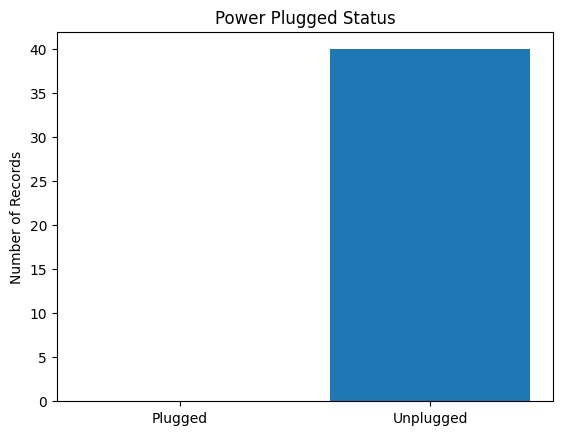

[36.0, 42.0, 47.0, 53.0, 53.0, 54.0, 54.0, 54.0, 54.0, 54.0, 54.0, 54.0, 54.0, 54.0, 54.0, 54.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 66.0, 68.0, 68.0, 68.0, 68.0, 68.0, 68.0, 68.0, 68.0, 68.0, 68.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 82.0, 82.0, 82.0, 82.0, 82.0, 82.0, 82.0, 82.0, 82.0, 82.0, 82.0, 82.0, 82.0, 82.0, 82.0, 82.0, 82.0, 82.0, 82.0, 82.0, 82.0, 82.0, 82.0, 82.0, 82.0, 82.0, 82.0, 82.0, 82.0, 82.0]


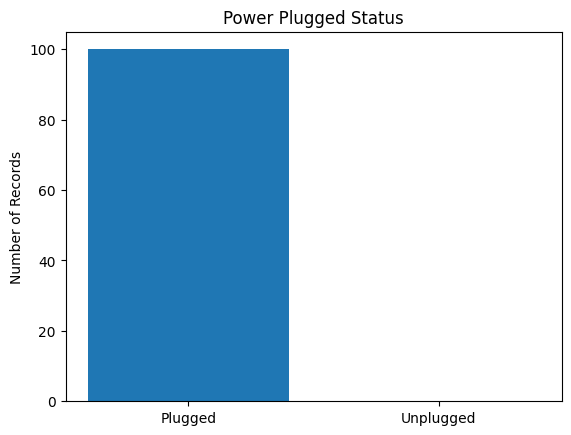

[74.0, 74.0, 74.0, 74.0, 74.0, 74.0, 74.0, 74.0, 74.0, 74.0, 74.0, 74.0, 74.0, 74.0, 74.0, 74.0, 74.0, 74.0, 74.0, 74.0, 74.0, 74.0, 74.0, 74.0, 74.0, 74.0, 74.0, 74.0, 74.0, 74.0]


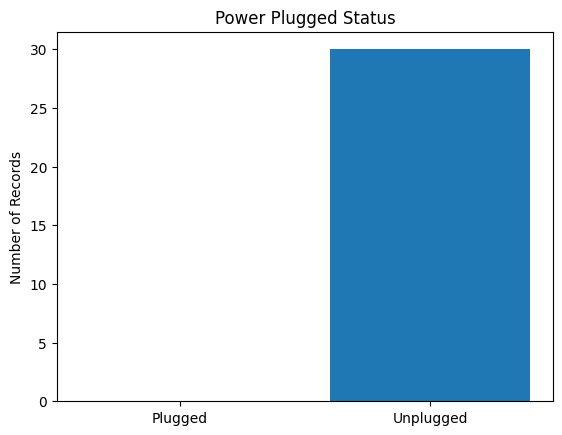

Devices with low battery and unplugged: []


In [4]:
import requests
import matplotlib.pyplot as plt
import json
from datetime import datetime 

BASE_URL = "http://localhost:8080" 

def retrieve_all_devices():
    response = requests.get(f"{BASE_URL}/devices")
    response.raise_for_status()
    return response.json()["mac_addres"]

def retrieve_battery_status(mac_address, start_date, end_date):
    response = requests.get(f"{BASE_URL}/device/{mac_address}", params={"start_date": start_date, "end_date": end_date})
    response.raise_for_status()
    return response.json()

def display_battery_status_chart(power_plugged):
    plugged_counts = sum(1 for record in power_plugged if record == 1.0)
    unplugged_counts = sum(1 for record in power_plugged if record == 0.0)
    plt.bar(['Plugged', 'Unplugged'], [plugged_counts, unplugged_counts])
    plt.ylabel('Number of Records')
    plt.title('Power Plugged Status')
    plt.show()

def retrieve_low_battery_devices():
    response = requests.get(f"{BASE_URL}/devices", params={"blt": 25, "plugged": 0})
    response.raise_for_status()
    return response.json()["mac_addres"]

def delete_device_data_entry(mac_address):
    response = requests.delete(f"{BASE_URL}/device/{mac_address}")
    response.raise_for_status()
    return response.json()

try:
    device_list = retrieve_all_devices()
    print(device_list[0])
    print("All Monitored Devices:", device_list)

    for device_id in device_list:
        start_date_= datetime.strptime("2024-01-15", "%Y-%m-%d")
        end_date_ = datetime.strptime("2024-02-03", "%Y-%m-%d")
        battery_info_data = retrieve_battery_status(device_id, start_date_, end_date_)
        print(battery_info_data["battery_levels"])
        power_plugged_data = battery_info_data["power_plugged"]
        display_battery_status_chart(power_plugged_data)

    low_battery_devices_list = retrieve_low_battery_devices()
    print("Devices with low battery and unplugged:", low_battery_devices_list)

    if device_list:
        delete_response_data = delete_device_data_entry(device_list[1])
        print("Delete response:", delete_response_data)

except requests.HTTPError as error:
    print(f"An error occurred: {error}")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f4c1e8e7-3e9e-4aba-a439-c0974b52f6c7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>